# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        
    </li>
    <li> Here in response encoding you need to apply the <strong>laplase smoothing</strong> value for test set. Laplase smoothing means, If test point is present in test but not in train then you need to apply default 0.5 as probability value for that data point (Refer the Response Encoding Image from above cell) </li>
    <li>Please use atleast <strong> 35k </strong> data points </li></ul>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
        Make sure that you are using predict_proba method to calculate AUC curves, because AUC is calcualted on class probabilities and not on class labels.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

# Few Notes

1. Use atleast 35k data points
2. Use classifier.Predict_proba() method instead of predict() method while calculating roc_auc scores
3. Be sure that you are using laplase smoothing in response encoding function. Laplase smoothing means applying the default (0.5) value to test data if the test data is not present in the train set


In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

sample_sentence_1='I am happy.'
ss_1 = sid.polarity_scores(sample_sentence_1)
print('sentiment score for sentence 1',ss_1)

sample_sentence_2='I am sad.'
ss_2 = sid.polarity_scores(sample_sentence_2)
print('sentiment score for sentence 2',ss_2)

sample_sentence_3='I am going to New Delhi tommorow.'
ss_3 = sid.polarity_scores(sample_sentence_3)
print('sentiment score for sentence 3',ss_3)


sentiment score for sentence 1 {'neg': 0.0, 'neu': 0.213, 'pos': 0.787, 'compound': 0.5719}
sentiment score for sentence 2 {'neg': 0.756, 'neu': 0.244, 'pos': 0.0, 'compound': -0.4767}
sentiment score for sentence 3 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [2]:
import pandas
data = pandas.read_csv('preprocessed_data.csv',nrows=35000)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 9 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   school_state                                  35000 non-null  object 
 1   teacher_prefix                                35000 non-null  object 
 2   project_grade_category                        35000 non-null  object 
 3   teacher_number_of_previously_posted_projects  35000 non-null  int64  
 4   project_is_approved                           35000 non-null  int64  
 5   clean_categories                              35000 non-null  object 
 6   clean_subcategories                           35000 non-null  object 
 7   essay                                         35000 non-null  object 
 8   price                                         35000 non-null  float64
dtypes: float64(1), int64(2), object(6)
memory usage: 2.4+ MB


In [7]:
project_data = pandas.read_csv('train_data.csv',nrows=35000)
project_data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0,0
1,140945,p258326,897464ce9ddc600bced1151f324dd63a,Mr.,FL,2016-10-25 09:22:10,Grades 6-8,"History & Civics, Health & Sports","Civics & Government, Team Sports",Wanted: Projector for Hungry Learners,Our students arrive to our school eager to lea...,The projector we need for our school is very c...,NaN,NaN,My students need a projector to help with view...,7,1
2,21895,p182444,3465aaf82da834c0582ebd0ef8040ca0,Ms.,AZ,2016-08-31 12:03:56,Grades 6-8,Health & Sports,"Health & Wellness, Team Sports",Soccer Equipment for AWESOME Middle School Stu...,"\r\n\""True champions aren't always the ones th...",The students on the campus come to school know...,NaN,NaN,"My students need shine guards, athletic socks,...",1,0
3,45,p246581,f3cb9bffbba169bef1a77b243e620b60,Mrs.,KY,2016-10-06 21:16:17,Grades PreK-2,"Literacy & Language, Math & Science","Literacy, Mathematics",Techie Kindergarteners,I work at a unique school filled with both ESL...,My students live in high poverty conditions wi...,NaN,NaN,My students need to engage in Reading and Math...,4,1
4,172407,p104768,be1f7507a41f8479dc06f047086a39ec,Mrs.,TX,2016-07-11 01:10:09,Grades PreK-2,Math & Science,Mathematics,Interactive Math Tools,Our second grade classroom next year will be m...,"For many students, math is a subject that does...",NaN,NaN,My students need hands on practice in mathemat...,1,1


In [8]:
project_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 17 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Unnamed: 0                                    35000 non-null  int64 
 1   id                                            35000 non-null  object
 2   teacher_id                                    35000 non-null  object
 3   teacher_prefix                                34998 non-null  object
 4   school_state                                  35000 non-null  object
 5   project_submitted_datetime                    35000 non-null  object
 6   project_grade_category                        35000 non-null  object
 7   project_subject_categories                    35000 non-null  object
 8   project_subject_subcategories                 35000 non-null  object
 9   project_title                                 35000 non-null  object
 10

## 1.1.1 Preprocessing project_title and adding project_title column to preprocessed data

In [9]:
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [10]:
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [11]:
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

In [12]:
preprocessed_titles = preprocess_text(project_data['project_title'].values)

100%|█████████████████████████████████████████████████████████████████████████| 35000/35000 [00:00<00:00, 45006.99it/s]


In [13]:
print("printing some random reviews")
print(9, project_data['project_title'].values[9])
print(34, project_data['project_title'].values[34])
print(147, project_data['project_title'].values[147])

printing some random reviews
9 Just For the Love of Reading--\r\nPure Pleasure
34 \"Have A Ball!!!\"
147 Who needs a Chromebook?\r\nWE DO!!


In [14]:
print("printing some random reviews")
print(9, preprocessed_titles[9])
print(34, preprocessed_titles[34])
print(147, preprocessed_titles[147])

printing some random reviews
9 love reading pure pleasure
34 ball
147 needs chromebook


In [15]:
data['project_title'] = preprocessed_titles

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   school_state                                  35000 non-null  object 
 1   teacher_prefix                                35000 non-null  object 
 2   project_grade_category                        35000 non-null  object 
 3   teacher_number_of_previously_posted_projects  35000 non-null  int64  
 4   project_is_approved                           35000 non-null  int64  
 5   clean_categories                              35000 non-null  object 
 6   clean_subcategories                           35000 non-null  object 
 7   essay                                         35000 non-null  object 
 8   price                                         35000 non-null  float64
 9   project_title                                 35000 non-null 

## 1.1.2 Sentiment Analysis of essay feature

In [17]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
negative = []
positive = []
neutral = []
compound = []
for sent in tqdm(data['essay']):
    res = sid.polarity_scores(sent)
    negative.append(res['neg'])
    positive.append(res['pos'])
    neutral.append(res['neu'])
    compound.append(res['compound'])

100%|███████████████████████████████████████████████████████████████████████████| 35000/35000 [00:56<00:00, 620.75it/s]


In [18]:
data['neg'] = negative
data['pos'] = positive
data['neu'] = neutral
data['compound'] = compound

<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [19]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

In [20]:
y = data['project_is_approved']
X = data.drop(['project_is_approved'],axis=1)

In [21]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35000 entries, 0 to 34999
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   school_state                                  35000 non-null  object 
 1   teacher_prefix                                35000 non-null  object 
 2   project_grade_category                        35000 non-null  object 
 3   teacher_number_of_previously_posted_projects  35000 non-null  int64  
 4   clean_categories                              35000 non-null  object 
 5   clean_subcategories                           35000 non-null  object 
 6   essay                                         35000 non-null  object 
 7   price                                         35000 non-null  float64
 8   project_title                                 35000 non-null  object 
 9   neg                                           35000 non-null 

## Import all important libraries

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,auc
from sklearn import metrics

from tqdm import tqdm
import os
import warnings
warnings.filterwarnings('ignore')
from chart_studio.plotly import plotly
import plotly.offline as offline

from sklearn.model_selection import train_test_split

In [24]:
#Splitting data into train and test data sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.33,stratify=y)
X_train.shape
X_test.shape

(11550, 13)

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [25]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# 1.3.1 Computing tfidf and tifidf w2v on feature essay

In [26]:
vectorizer_tfidf = TfidfVectorizer()
vectorizer_tfidf.fit(X_train['essay'].values)

X_train_essay_tfidf = vectorizer_tfidf.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer_tfidf.transform(X_test['essay'].values)
print("Shape after performing tfidf_vectorization:")
print("="*100)
print(X_train_essay_tfidf.shape,y_train.shape)
print(X_test_essay_tfidf.shape,y_test.shape)

Shape after performing tfidf_vectorization:
(23450, 30613) (23450,)
(11550, 30613) (11550,)


In [27]:
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [28]:
dictionary = dict(zip(vectorizer_tfidf.get_feature_names(), list(vectorizer_tfidf.idf_)))
tfidf_words = set(vectorizer_tfidf.get_feature_names())

In [29]:
X_train_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['essay']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_tfidf_w2v_vectors.append(vector)

print(len(X_train_tfidf_w2v_vectors))
print(len(X_train_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 23450/23450 [00:45<00:00, 518.75it/s]

23450
300


In [30]:
X_test_tfidf_w2v_vectors = []
for sentence in tqdm(X_test['essay']):
    vector = np.zeros(300)
    tf_idf_weight = 0
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model['word']
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_tfidf_w2v_vectors.append(vector)

print(len(X_test_tfidf_w2v_vectors))
print(len(X_test_tfidf_w2v_vectors[0]))

100%|███████████████████████████████████████████████████████████████████████████| 11550/11550 [00:26<00:00, 439.57it/s]

11550
300


# 1.3.2 Computing tfidf and tifidf w2v on feature project_title


In [31]:
vectorizer_title = TfidfVectorizer()
vectorizer_title.fit(X_train['project_title'].values)

X_train_title_tfidf = vectorizer_title.transform(X_train['project_title'].values)
X_test_title_tfidf = vectorizer_title.transform(X_test['project_title'].values)
print("Shape after performing tfidf_vectorization:")
print("="*100)
print(X_train_title_tfidf.shape,y_train.shape)
print(X_test_title_tfidf.shape,y_test.shape)

Shape after performing tfidf_vectorization:
(23450, 8094) (23450,)
(11550, 8094) (11550,)


In [32]:
import pickle
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [33]:
dictionary = dict(zip(vectorizer_title.get_feature_names(), list(vectorizer_title.idf_)))
tfidf_words = set(vectorizer_title.get_feature_names())

In [34]:
X_train_title_tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sentence in tqdm(X_train['project_title']): # for each review/sentence
    vector = np.zeros(300) # as word vectors are of zero length
    tf_idf_weight =0; # num of words with a valid vector in the sentence/review
    for word in sentence.split(): # for each word in a review/sentence
        if (word in glove_words) and (word in tfidf_words):
            vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_train_title_tfidf_w2v_vectors.append(vector)

print(len(X_train_title_tfidf_w2v_vectors))
print(len(X_train_title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 23450/23450 [00:00<00:00, 39922.18it/s]

23450
300


In [35]:
X_test_title_tfidf_w2v_vectors = []
for sentence in tqdm(X_test['project_title']):
    vector = np.zeros(300)
    tf_idf_weight = 0
    for word in sentence.split():
        if (word in glove_words) and (word in tfidf_words):
            vec = model['word']
            tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
            vector += (vec * tf_idf) # calculating tfidf weighted w2v
            tf_idf_weight += tf_idf
    if tf_idf_weight != 0:
        vector /= tf_idf_weight
    X_test_title_tfidf_w2v_vectors.append(vector)

print(len(X_test_title_tfidf_w2v_vectors))
print(len(X_test_title_tfidf_w2v_vectors[0]))

100%|█████████████████████████████████████████████████████████████████████████| 11550/11550 [00:00<00:00, 37835.98it/s]

11550
300


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [36]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

## 1.4.1 Defining a function to encode categorical as respond coding

In [37]:
def fit(feature):
    X_train['class_label']=y_train # adding 'project_is_approved' column to x_train
    count = X_train[ feature ].value_counts() # getting value counts(denominator) of each category
    feature_dictionary = dict()
    for i, denominator in count.items():
        vector = []
        for j in range(2):
            compare =X_train.loc[ ( X_train['class_label'] == j ) & (X_train[feature] == i ) ]
            vector.append( len( compare)  / denominator   )
        feature_dictionary[i] = vector    # adding probability of each class label for a pariticular category of feature
    return feature_dictionary  
def transform(feature, df ):
    feature_dictionary = fit(feature)
    count = X_train[feature].value_counts()
    f=[]
    for cat in df[feature]:
        if cat in dict( count ).keys():# transform test data with trainning probabilities
            f.append( feature_dictionary[cat] )
        else:
            f.append([0.5, 0.05])# Applying Laplace smoothing to data poits which are present in X_train but not in X_test
    return f

<h3>1.4.1 encoding categorical feature: school_state using response coding</h3>

In [38]:
X_train_school_state = np.array(transform('school_state',X_train))

X_test_school_state = np.array(transform('school_state',X_test))

print("After vectorization of feature_school_state:")
print("="*100)
print(X_train_school_state.shape,y_train.shape)
print(X_test_school_state.shape,y_test.shape)



After vectorization of feature_school_state:
(23450, 2) (23450,)
(11550, 2) (11550,)


<h3>1.4.2 encoding categorical feature: teacher_prefix using response coding</h3>

In [39]:
X_train_teacher_prefix = np.array(transform('teacher_prefix',X_train))

X_test_teacher_prefix = np.array(transform('teacher_prefix',X_test))
print("\nAfter vectorization of teacher_prefix:")
print("="*100)
print(X_train_teacher_prefix.shape,y_train.shape)

print(X_test_teacher_prefix.shape,y_test.shape)


After vectorization of teacher_prefix:
(23450, 2) (23450,)
(11550, 2) (11550,)


<h3>1.4.3 encoding categorical feature: project_grade_category using response coding</h3>

In [40]:
X_train_grade = np.array(transform('project_grade_category',X_train))

X_test_grade = np.array(transform('project_grade_category',X_test))
print("\nShape after vectorization of project_grade_category")
print("="*100)
print(X_train_grade.shape,y_train.shape)

print(X_test_grade.shape,y_test.shape)


Shape after vectorization of project_grade_category
(23450, 2) (23450,)
(11550, 2) (11550,)


<h3>1.4.4 encoding categorical feature: clean_categories using response coding</h3>

In [41]:
X_train_clean_cate = np.array(transform('clean_categories',X_train))
X_test_clean_cate = np.array(transform('clean_categories',X_test))
print("Shapes after vectorizing clean_categories feature:")
print("="*100)
print(X_train_clean_cate.shape,y_train.shape)
print(X_test_clean_cate.shape,y_test.shape)

Shapes after vectorizing clean_categories feature:
(23450, 2) (23450,)
(11550, 2) (11550,)


<h3>1.4.5 encoding categorical feature: clean_subcategories using response coding</h3>

In [42]:
X_train_subcate = np.array(transform('clean_subcategories',X_train))

X_test_subcate = np.array(transform('clean_subcategories',X_test))
print("Shapes after vectorizing clean_subcategories feature:")
print('='*100)
print(X_train_subcate.shape,y_train.shape)

print(X_test_subcate.shape,y_test.shape)

Shapes after vectorizing clean_subcategories feature:
(23450, 2) (23450,)
(11550, 2) (11550,)


In [43]:
# Encoding numerical features

## 1.4.6 Encoding Numerical features using MinMaxScaler

In [44]:
from sklearn.preprocessing import MinMaxScaler
price_scaler = MinMaxScaler()
price_scaler.fit(X_train['price'].values.reshape(-1,1))
X_train_price_scaler = price_scaler.transform(X_train['price'].values.reshape(-1,1))

X_test_price_scaler = price_scaler.transform(X_test['price'].values.reshape(-1,1))
print("encoding numerical features Price:")
print("="*100)
print(X_train_price_scaler.shape)

print(X_test_price_scaler.shape)

encoding numerical features Price:
(23450, 1)
(11550, 1)


In [45]:
from sklearn.preprocessing import MinMaxScaler
previous_year_scaler = MinMaxScaler()

previous_year_scaler.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

X_train_previous_projects = previous_year_scaler.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_previous_projects = previous_year_scaler.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("encoding numerical features teacher_number_of_previously_posted_projects:")
print("="*100)
print(X_train_previous_projects.shape)

print(X_test_previous_projects.shape)

encoding numerical features teacher_number_of_previously_posted_projects:
(23450, 1)
(11550, 1)


In [46]:
from sklearn.preprocessing import MinMaxScaler
negative_value_scaler = MinMaxScaler()

negative_value_scaler.fit(X_train['neg'].values.reshape(-1,1))

X_train_negative = negative_value_scaler.transform(X_train['neg'].values.reshape(-1,1))
X_test_negative = negative_value_scaler.transform(X_test['neg'].values.reshape(-1,1))

print("encoding numerical features negative values of sentiment analysis:")
print("="*100)
print(X_train_negative.shape)

print(X_test_negative.shape)

encoding numerical features negative values of sentiment analysis:
(23450, 1)
(11550, 1)


In [47]:
from sklearn.preprocessing import MinMaxScaler
positive_value_scaler = MinMaxScaler()

positive_value_scaler.fit(X_train['pos'].values.reshape(-1,1))

X_train_positive = positive_value_scaler.transform(X_train['pos'].values.reshape(-1,1))
X_test_positive =positive_value_scaler.transform(X_test['pos'].values.reshape(-1,1))

print("encoding numerical features positive values of sentiment analysis:")
print("="*100)
print(X_train_positive.shape)

print(X_test_positive.shape)

encoding numerical features positive values of sentiment analysis:
(23450, 1)
(11550, 1)


In [48]:
from sklearn.preprocessing import MinMaxScaler
neutral_value_scaler = MinMaxScaler()

neutral_value_scaler.fit(X_train['neu'].values.reshape(-1,1))

X_train_neutral =neutral_value_scaler.transform(X_train['neu'].values.reshape(-1,1))
X_test_neutral = neutral_value_scaler.transform(X_test['neu'].values.reshape(-1,1))

print("encoding numerical features neutral values of sentiment analysis:")
print("="*100)
print(X_train_neutral.shape)

print(X_test_neutral.shape)

encoding numerical features neutral values of sentiment analysis:
(23450, 1)
(11550, 1)


In [49]:
from sklearn.preprocessing import MinMaxScaler
compound_value_scaler = MinMaxScaler()

compound_value_scaler.fit(X_train['neu'].values.reshape(-1,1))

X_train_compound = compound_value_scaler.transform(X_train['compound'].values.reshape(-1,1))
X_test_compound = compound_value_scaler.transform(X_test['compound'].values.reshape(-1,1))

print("encoding numerical features coumpond values of sentiment analysis:")
print("="*100)
print(X_train_compound.shape)

print(X_test_compound.shape)

encoding numerical features coumpond values of sentiment analysis:
(23450, 1)
(11550, 1)


## Set 1: categorical, numerical features + preprocessed_eassay (TFIDF)+preprocessed_title(TFIDF)

In [50]:
from scipy.sparse import hstack

X_tr_tfidf = hstack((X_train_school_state,X_train_clean_cate,X_train_grade,X_train_subcate,X_train_teacher_prefix,X_train_essay_tfidf,X_train_title_tfidf,X_train_price_scaler,X_train_previous_projects,
                     X_train_negative,X_train_positive,X_train_neutral,X_train_compound))
X_ts_tfidf = hstack((X_test_school_state,X_test_clean_cate,X_test_grade,X_test_subcate,X_test_teacher_prefix,X_test_essay_tfidf,X_test_title_tfidf,X_test_price_scaler,X_test_previous_projects,
                     X_test_negative,X_test_positive,X_test_neutral,X_test_compound))

X_tr_tfidf = X_tr_tfidf.tocsr()
X_ts_tfidf = X_ts_tfidf.tocsr()

print(X_tr_tfidf.shape,y_train.shape)

print(X_ts_tfidf.shape,y_test.shape)

(23450, 38723) (23450,)
(11550, 38723) (11550,)


## Set 2: categorical, numerical features + preprocessed_eassay (TFIDF_W2Vec)+preprocessed_title(TFIDF_W2Vec)

In [51]:
from scipy.sparse import hstack

X_tr_tfidf_w2v = hstack((X_train_school_state,X_train_clean_cate,X_train_grade,X_train_subcate,X_train_teacher_prefix,X_train_tfidf_w2v_vectors,X_train_title_tfidf_w2v_vectors,X_train_title_tfidf,X_train_price_scaler,X_train_previous_projects,
                     X_train_negative,X_train_positive,X_train_neutral,X_train_compound))
X_ts_tfidf_w2v = hstack((X_test_school_state,X_test_clean_cate,X_test_grade,X_test_subcate,X_test_teacher_prefix,X_test_tfidf_w2v_vectors,X_test_title_tfidf_w2v_vectors,X_test_title_tfidf,X_test_price_scaler,X_test_previous_projects,
                     X_test_negative,X_test_positive,X_test_neutral,X_test_compound))

X_tr_tfidf_w2v = X_tr_tfidf_w2v.tocsr()
X_ts_tfidf_w2v = X_ts_tfidf_w2v.tocsr()

print(X_tr_tfidf_w2v.shape,y_train.shape)

print(X_ts_tfidf_w2v.shape,y_test.shape)

(23450, 8710) (23450,)
(11550, 8710) (11550,)


<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [52]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

# GRADIENT BOOSTING CLASSIFIER USING GRID SEARCH CROSS VALIDATION (SET - 1)

In [53]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[1,3,5,6],"n_estimators":[5,10,15,20] }
clf1 = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5,  scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf1.fit(X_tr_tfidf,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [1, 3, 5, 6],
                         'n_estimators': [5, 10, 15, 20]},
             return_train_score=True, scoring='roc_auc')

In [54]:
result1 = pd.DataFrame(clf1.cv_results_)
train_auc= result1['mean_train_score']
train_auc_std=result1['std_train_score']
cv_auc = result1['mean_test_score']
cv_auc_std = result1['std_test_score']
bestMaxdepth_1 = clf1.best_params_['max_depth']
bestestimator_1 = clf1.best_params_['n_estimators']
bestscore_1 = clf1.best_score_

In [55]:
print("Best Max Depth:",bestMaxdepth_1,"Best estimator:",bestestimator_1,"Best Score:",bestscore_1)

Best Max Depth: 6 Best estimator: 20 Best Score: 0.6931957819096095


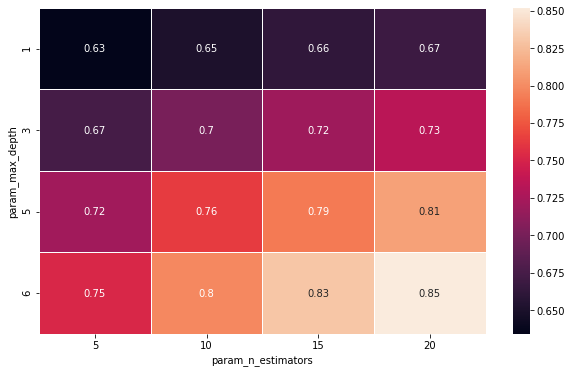

In [56]:
import pandas as pd
pvt = pd.pivot_table(result1,
    values='mean_train_score', index='param_max_depth', columns='param_n_estimators') #https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search
plt.figure(figsize=(10,6))
ax=sns.heatmap(pvt,annot=True,linewidths=.5)

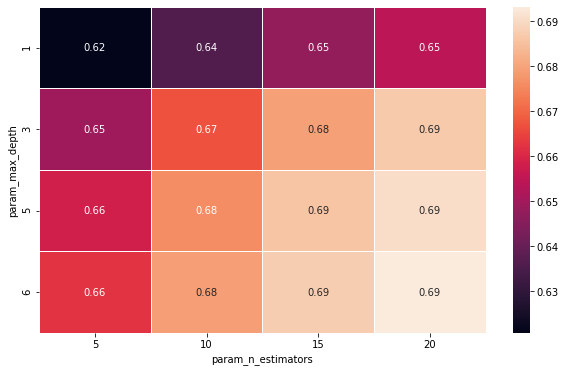

In [57]:
import pandas as pd
pvt = pd.pivot_table(result1,
    values='mean_test_score', index='param_max_depth', columns='param_n_estimators') #https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search
plt.figure(figsize=(10,6))
ax=sns.heatmap(pvt,annot=True,linewidths=.5)

Roc Plot Of Train And Test Data

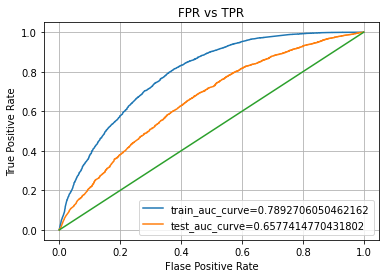

In [60]:
from sklearn.metrics import roc_auc_score,auc
from sklearn.metrics import roc_curve
dt_tfidf_testModel = GradientBoostingClassifier(max_depth=bestMaxdepth_1,n_estimators=10)
dt_tfidf_testModel.fit(X_tr_tfidf,y_train)

y_train_pred = dt_tfidf_testModel.predict_proba(X_tr_tfidf)[:,1]
y_test_pred = dt_tfidf_testModel.predict_proba(X_ts_tfidf)[:,1]

predictions_train_set1 = dt_tfidf_testModel.predict(X_tr_tfidf)
predictions_test_set1 = dt_tfidf_testModel.predict(X_ts_tfidf)

train_fpr,train_tpr,train_thresholds = roc_curve(y_train,y_train_pred)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,y_test_pred)

train_auc = auc(train_fpr,train_tpr)
test_auc = auc(test_fpr,test_tpr)

plt.plot(train_fpr,train_tpr,label='train_auc_curve='+str(train_auc))
plt.plot(test_fpr,test_tpr,label='test_auc_curve='+str(test_auc))
plt.grid()
plt.xlabel('Flase Positive Rate')
plt.plot([0, 1], [0, 1])
plt.ylabel('True Positive Rate')
plt.legend()
plt.title("FPR vs TPR")
plt.show()


In [61]:
def best_threshold(threshould,fpr,tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
     # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t
def predict_with_best_t(proba,threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

## Confusion Matrix of Train and Test datasets

In [62]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = best_threshold(train_thresholds,train_fpr,train_tpr)
print("Train_Set1_Confusion_matrix")
print(confusion_matrix(y_train,predict_with_best_t(y_train_pred,best_t)))
print("="*100)
print("Test_Set1_Confusion_matrix")
print(confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_t)))

the maximum value of tpr*(1-fpr) 0.5103427593084456 for threshold 0.838
Train_Set1_Confusion_matrix
[[ 2400  1199]
 [ 4659 15192]]
Test_Set1_Confusion_matrix
[[ 883  889]
 [2700 7078]]


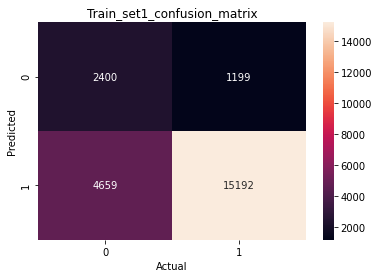

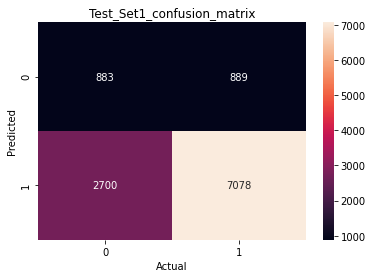

In [63]:
import seaborn as sns
heatmap_train = sns.heatmap(confusion_matrix(y_train,predict_with_best_t(y_train_pred,best_t)),annot=True,fmt = 'd')
plt.title("Train_set1_confusion_matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
print("="*100)
heatmap_test = sns.heatmap(confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_t)),annot=True,fmt='d')
plt.title("Test_Set1_confusion_matrix")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

# GRADIENT BOOSTING CLASSIFIER USING GRID SEARCH CROSS VALIDATION (SET - 2)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
parameters = {"max_depth":[1,3,5,6],"n_estimators":[5,10,15,20] }
clf2 = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5,  scoring='roc_auc',return_train_score=True,n_jobs=-1)
clf2.fit(X_tr_tfidf_w2v,y_train)

In [ ]:
result2 = pd.DataFrame(clf2.cv_results_)
train_auc= clf2.cv_results_['mean_train_score']
train_auc_std= clf2.cv_results_['std_train_score']
cv_auc = clf2.cv_results_['mean_test_score']
cv_auc_std= clf2.cv_results_['std_test_score']
bestMaxDepth_2=clf2.best_params_['max_depth']
bestestimator_2=clf2.best_params_['n_estimators']
bestScore_2=clf2.best_score_


In [ ]:
print("BEST MAX DEPTH: ",clf2.best_params_['max_depth']," BEST SCORE: ",clf2.best_score_,"BEST ESTIMATOR: ",clf2.best_params_['n_estimators']) #clf.best_estimator_.alpha

In [ ]:
import pandas as pd
pvt = pd.pivot_table(result2,
    values='mean_train_score', index='param_max_depth', columns='param_n_estimators') #https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search
plt.figure(figsize=(10,6))
ax=sns.heatmap(pvt,annot=True,linewidths=.5)

In [ ]:
import pandas as pd
pvt = pd.pivot_table(result2,
    values='mean_test_score', index='param_max_depth', columns='param_n_estimators') #https://stackoverflow.com/questions/48791709/how-to-plot-a-heat-map-on-pivot-table-after-grid-search
plt.figure(figsize=(10,6))
ax=sns.heatmap(pvt,annot=True,linewidths=.5)

Roc Plot Of Train And Test Data

In [ ]:
from sklearn.metrics import roc_auc_score,auc
dt_tfidf_w2v_testModel = GradientBoostingClassifier(max_depth=bestMaxdepth_1,n_estimators=10)
dt_tfidf_w2v_testModel.fit(X_tr_tfidf_w2v,y_train)

y_train_pred = dt_tfidf_w2v_testModel.predict_proba(X_tr_tfidf_w2v)[:,1]
y_test_pred = dt_tfidf_w2v_testModel.predict_proba(X_ts_tfidf_w2v)[:,1]

predictions_train_set2 = dt_tfidf_w2v_testModel.predict(X_tr_tfidf_w2v)
predictions_test_set2 = dt_tfidf_w2v_testModel.predict(X_ts_tfidf_w2v)

train_fpr,train_tpr,train_thresholds = roc_curve(y_train,y_train_pred)
test_fpr,test_tpr,test_thresholds = roc_curve(y_test,y_test_pred)

train_auc = auc(train_fpr,train_tpr)
test_auc = auc(test_fpr,test_tpr)

plt.plot(train_fpr,train_tpr,label='train_auc_curve='+str(train_auc))
plt.plot(test_fpr,test_tpr,label='test_auc_curve='+str(test_auc))
plt.grid()
plt.xlabel('Flase Positive Rate')
plt.plot([0, 1], [0, 1])
plt.ylabel('True Positive Rate')
plt.legend()
plt.title("FPR vs TPR")
plt.show()

In [ ]:
def best_threshold(threshould,fpr,tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
     # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t
def predict_with_best_t(proba,threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

## Confusion Matrix of Train and Test datasets

In [ ]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = best_threshold(train_thresholds,train_fpr,train_tpr)
print("Train_Set2_Confusion_matrix")
print(confusion_matrix(y_train,predict_with_best_t(y_train_pred,best_t)))
print("="*100)
print("Test_Set2_Confusion_matrix")
print(confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_t)))

In [ ]:
import seaborn as sns
heatmap_train = sns.heatmap(confusion_matrix(y_train,predict_with_best_t(y_train_pred,best_t)),annot=True,fmt = 'd')
plt.title("Train_set2_confusion_matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()
print("="*100)
heatmap_test = sns.heatmap(confusion_matrix(y_test,predict_with_best_t(y_test_pred,best_t)),annot=True,fmt='d')
plt.title("Test_Set2_confusion_matrix")
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

In [ ]:
from prettytable import PrettyTable
compare_model = PrettyTable(['Vectorizer','Model','Hyperparameter','AUC'])
compare_model.add_row (["Tfidf","GradientBoostingDecisionTree",[bestMaxdepth_1,bestestimator_1],np.round(bestscore_1,4)])
compare_model.add_row (["Tfidf_w2v","GradientBoostingDecisiontree",[bestMaxDepth_2,bestestimator_2],np.round(bestScore_2,4)])

print(compare_model)